In [1]:
import numpy as np
import os
import random
import SimpleITK as sitk
import pydicom
import matplotlib.pyplot as plt

In [115]:
dir1 = '/home/cyx/dataset/CHAOS/CT_data_batch1'
dir2 = '/home/cyx/dataset/CHAOS/CT_data_batch2'
data1 = [os.path.join(dir1, x) for x in os.listdir(dir1)]
data2 = [os.path.join(dir2, x) for x in os.listdir(dir2)]
train_list = data1
val_list = data2[:5]
test_list = data2[5:]

# 归一化处理

In [3]:
def normalize(image):
    MIN_BOUND = -1000.0
    MAX_BOUND = 400.0
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

# 显示图片

In [4]:
def showImage(image):
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.bone)
    plt.show()

In [5]:
def showHist(image):
    plt.hist(image.flatten(), bins=80, color='c')
    plt.xlabel("HU")
    plt.ylabel("Frequency")
    plt.show()

# 读取dicom

In [20]:
def readDicom(slices):
    slices = [dicom.read_file(s) for s in slices]
    image = np.stack([s.pixel_array for s in slices])
    image = image.astype(np.float64)
    image[image == -2000] = 0
    for slice_number in range(len(slices)):
        intercept = slices[slice_number].RescaleIntercept  #Intercept
        slope = slices[slice_number].RescaleSlope  #Rescale
        if slope != 1:
            image[slice_number] = slope * image[slice_number]
#             image[slice_number] = image[slice_number].astype(np.int16)
        image[slice_number] += np.float64(intercept)
        image[slice_number] = normalize(image[slice_number])
    return image

# 读取jpg

In [109]:
def readJpg(mask):
    mask = plt.imread(mask)
    return np.array(mask, dtype=np.float64)

# 测试用例

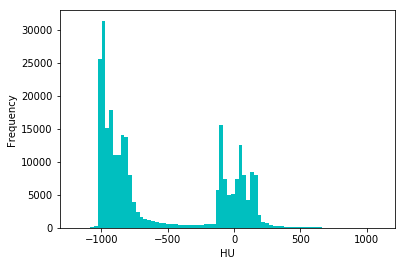

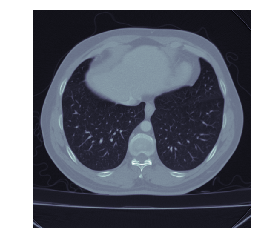

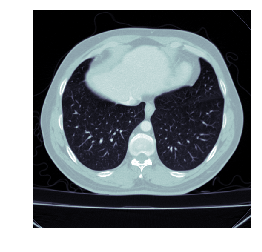

In [12]:
import pydicom
file = dicom.read_file('/home/cyx/dataset/CHAOS/CT_data_batch1/1/DICOM_anon/i0012,0000b.dcm')

# file.ImagePositionPatient
image = file.pixel_array.astype(np.int16)
image[image == -2000] = 0
intercept = file.RescaleIntercept # '-1200.000000'
slope = file.RescaleSlope # '1.000000

# 将灰度值转化为HU单元。代入HU公式 Hounsfield Unit = pixel_value * rescale_slope + rescale_intercept
if slope != 1:
    image = slope * image.astype(np.float64)
    image = image.astype(np.int16)
image += np.int16(intercept)

# 用plt统计HU分布情况
plt.hist(image.flatten(), bins=80, color='c')
plt.xlabel("HU")
plt.ylabel("Frequency")
plt.show()

#显示slice
showImage(image)

# 归一化处理
image = normalize(image)
showImage(image)

# 读取一个batch数据

In [107]:
def loadData(data_list):
    path = data_list[random.randint(0, len(data_list) - 1)]
    
    print(path)
    img = [path + '/DICOM_anon/' + x for x in os.listdir(path + '/DICOM_anon')]
    msk = [path + '/Ground/' + x for x in os.listdir(path + '/Ground')]
    img.sort()
    msk.sort()
    startnum = random.randint(0, len(img) - 39)
    endnum = startnum + 38
    img = readDicom(img[startnum: endnum])
    msk = readJpg(msk[startnum + (endnum - startnum) // 2 - 1])
    return img, msk

/home/cyx/dataset/CHAOS/CT_data_batch1/8


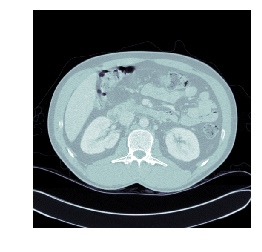

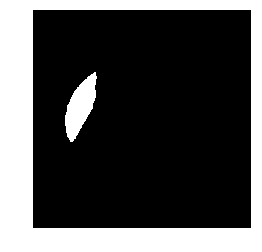

In [112]:
img, msk = loadData(train_list)
showImage(img[19])
showImage(msk)